In [64]:
import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
df = pd.read_csv("/content/drive/MyDrive/Đồ Án Phân Tích Dữ Liệu/Source_Code/final_data.csv")
df.head()

,Make,Model,Body color,Interior color,Interior material,Body,Doors,Seats,Fuel,Transmission,...,CO2 emissions,Emission class,Mileage,First registration,Battery type,AC charging time,Battery capacity,Previous owners,Warranty until,Price
0,Fiat,500X,Blue,Other interior color,Full leather interior,SUV / offroad,4/5 doors,5,Petrol,Automatic,...,140,Euro 6d,14117,2022,No battery type class,0.0,0.0,2,3.0,28899.0
1,Ford,Focus,Black,Other interior color,Cloth interior,Station Wagon,4/5 doors,5,Diesel,Manual,...,98,No emission class,85400,2020,No battery type class,0.0,0.0,Unknown,5.0,18799.0
2,Volkswagen,T-Roc,White,Grey interior,Cloth interior,Cabriolet,4/5 doors,4,Petrol,Automatic,...,130,Euro 6d,5000,2023,No battery type class,0.0,0.0,1,3.0,42649.0
3,Audi,S5,Grey,Black interior,Alcantara interior,Coupe,4/5 doors,5,Diesel,Automatic,...,161,Euro 6d-TEMP,43800,2020,No battery type class,0.0,0.0,2,4.0,56049.0
4,BMW,118,White,Black interior,Full leather interior,Hatchback,4/5 doors,5,Petrol,Automatic,...,111,Euro 6,18104,2019,No battery type class,0.0,0.0,1,6.0,29649.0


# Câu 1: Kiểm tra kiểu dữ liệu của các biến có phù hợp? Bộ dữ liệu có bị khuyết giá trị?

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1409 non-null   object 
 1   Model               1409 non-null   object 
 2   Body color          1409 non-null   object 
 3   Interior color      1409 non-null   object 
 4   Interior material   1409 non-null   object 
 5   Body                1409 non-null   object 
 6   Doors               1409 non-null   object 
 7   Seats               1409 non-null   object 
 8   Fuel                1409 non-null   object 
 9   Transmission        1409 non-null   object 
 10  Drive type          1409 non-null   object 
 11  Power               1409 non-null   int64  
 12  Engine capacity     1409 non-null   float64
 13  CO2 emissions       1409 non-null   int64  
 14  Emission class      1409 non-null   object 
 15  Mileage             1409 non-null   int64  
 16  First 

In [68]:
df.isnull().sum()

Make                  0
Model                 0
Body color            0
Interior color        0
Interior material     0
Body                  0
Doors                 0
Seats                 0
Fuel                  0
Transmission          0
Drive type            0
Power                 0
Engine capacity       0
CO2 emissions         0
Emission class        0
Mileage               0
First registration    0
Battery type          0
AC charging time      0
Battery capacity      0
Previous owners       0
Warranty until        0
Price                 0
dtype: int64

# Câu 2: Phân loại các biến số trong bộ dữ liệu biến nào tương đối gần mức đối xứng, các biến nào đang mất cân đối.

In [69]:
df_number = df[['Power', 'Engine capacity', 'CO2 emissions', 'Mileage', 'First registration',
                'AC charging time', 'Battery capacity', 'Warranty until', 'Price']]

In [70]:
# hàm kiểm tra đối xứng mean, median, mode
def check_symmetry_of_series(series, percent=0.1):
  mean = series.mean()
  median = series.median()
  mode = series.mode()

  if len(mode)==1:
    if abs(median - mean) <= percent*median and abs(median - mode[0]) <= percent*median:
      return True
    else: return False
  else:
    return False

In [71]:
# kiểm tra tất cả các biến số
def check_symmetry_of_df(df_number):
  d = {}
  for col in df_number.columns:
    d[col] = check_symmetry_of_series(df_number[col])
  return d

In [72]:
result = check_symmetry_of_df(df_number)
result_symmetry = [x for x in result if result[x]==True]
result_not_symmetry = [x for x in result if result[x]==False]

In [73]:
print('Danh sách biến số gần mức đối xứng: ', result_symmetry)
print('Danh sách biến số mất cân đối: ', result_not_symmetry)

Danh sách biến số gần mức đối xứng:  ['Power', 'First registration']
Danh sách biến số mất cân đối:  ['Engine capacity', 'CO2 emissions', 'Mileage', 'AC charging time', 'Battery capacity', 'Warranty until', 'Price']


# Câu 3: Trong tất cả các biến kiểu số thì biến nào có ảnh hưởng đến giá xe (Chứng minh bằng phương pháp dùng regplot và xét hệ số tương quan kết hợp P-value)


In [74]:
df_number.columns

Index(['Power', 'Engine capacity', 'CO2 emissions', 'Mileage',
       'First registration', 'AC charging time', 'Battery capacity',
       'Warranty until', 'Price'],
      dtype='object')

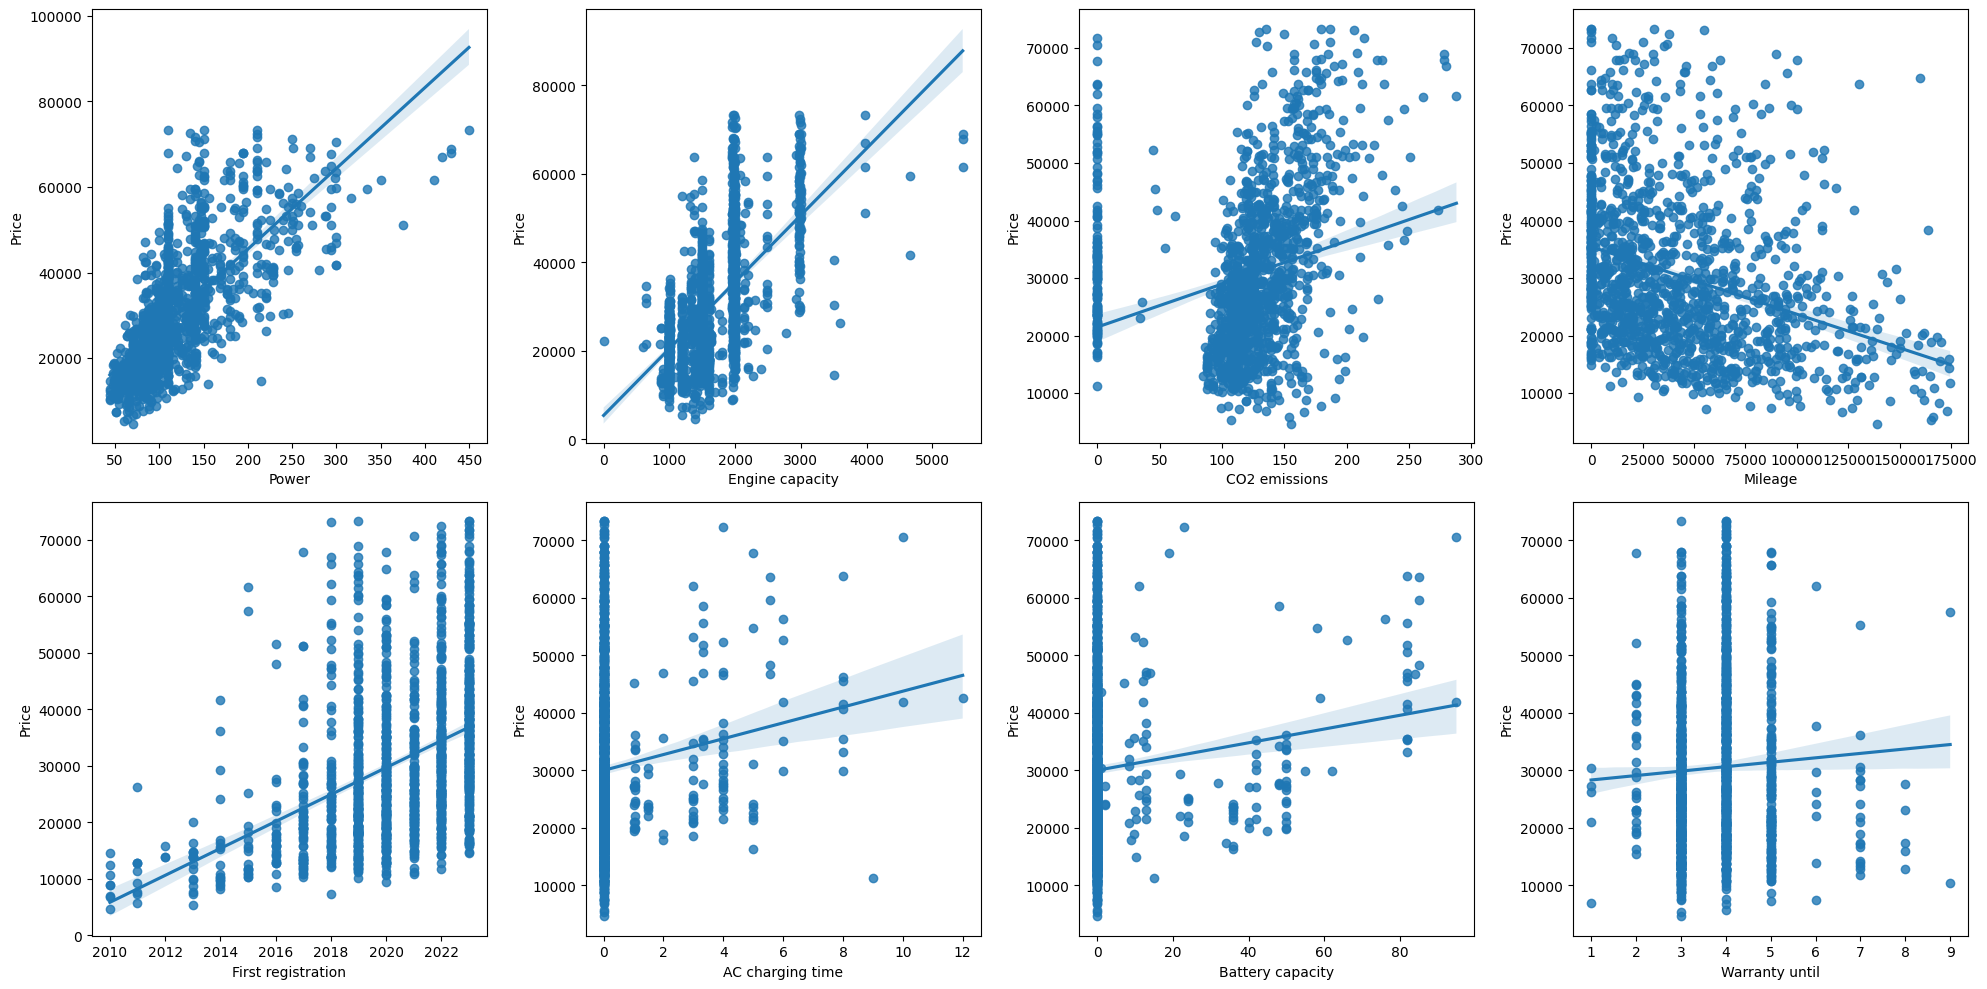

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
i, j = 0, 0

col = df_number.columns
for i in range(2):
    for j in range(4):
        sns.regplot(x=df_number[col[i*4+j]], y=df_number["Price"], data=df_number, ax=axes[i][j])

plt.tight_layout()
plt.show()

In [76]:
import scipy.stats as stats
def check_correclation(s1, s2):
  r, p = stats.pearsonr(s1, s2)
  if p < 0.05:
    # trả về mức độ 1:(-1,-0.8) (0.8,1) | mức độ 2:(-0.8,-0.5) (0.5,0.8) | mức độ 3:(-0.5,-0.3) (0.3,0.5) và r
    if 0.8<abs(r)<1:
      return [1, r]
    if 0.5<abs(r)<0.8:
      return [2, r]
    if 0.3<abs(r)<0.5:
      return [3, r]
  else:
    return False

In [77]:
def find_correlate_variable(df_number):
  dict_correlate = {}
  for col in df_number.columns:
    if col != 'Price':
      result = check_correclation(df_number[col], df_number["Price"])
      if result:
        dict_correlate[col] = result
  return dict_correlate

In [78]:
dict_correlate = find_correlate_variable(df_number)
dict_correlate

{'Power': [2, 0.715829502096282],
 'Engine capacity': [2, 0.6143677943106074],
 'Mileage': [3, -0.3211522635180734],
 'First registration': [3, 0.4296732694334328]}

Trong các biến kiểu số thì biến ảnh hưởng đến giá xe là: Power, Engine capacity, Mileage, First registration

# Câu 4: Trong các biến kiểu số của bộ dữ liệu có khả năng ảnh hưởng đến giá xe thì biến nào ảnh hưởng ít nhất, biến nào ảnh hưởng nhiều nhất.

In [79]:
lst_numberic_important = sorted(dict_correlate.items(), key=lambda x: abs(x[1][-1]), reverse=True)
lst_numberic_important

[('Power', [2, 0.715829502096282]),
 ('Engine capacity', [2, 0.6143677943106074]),
 ('First registration', [3, 0.4296732694334328]),
 ('Mileage', [3, -0.3211522635180734])]

Biến số có nhiều ảnh hưởng đến giá xe nhất là: "Power"

Biến số có ít ảnh hưởng đến giá xe nhất là: "Mileage"

# Câu 5: Tìm kiểu dáng của xe có khả năng ít ảnh hưởng đến giá nhất.

In [80]:
def cal_anova_of_variable(lst_col, option=True):

  df_groups = df[lst_col].groupby(lst_col[:-1])

  names_groups = df[df[lst_col[:-1]].duplicated()==True][lst_col[:-1]].drop_duplicates().values

  if len(lst_col) > 2:
    group_values = [df_groups.get_group(tuple(name))['Price'] for name in names_groups]
  else:
    group_values = [df_groups.get_group(name[0])['Price'] for name in names_groups]

  f_statistic, p_value = stats.f_oneway(*group_values)
  if p_value < 0.05:
    if option:
      lst = [[list(name), 0] for name in names_groups]
      for i in range(len(group_values)-1):
        for j in range(len(group_values)):
          f, p = stats.f_oneway(group_values[i], group_values[j])
          if p < 0.05 and p > 0:
            lst[i][1] += f
            lst[j][1] += f
      return lst
    else: return f_statistic
  else:
      return False

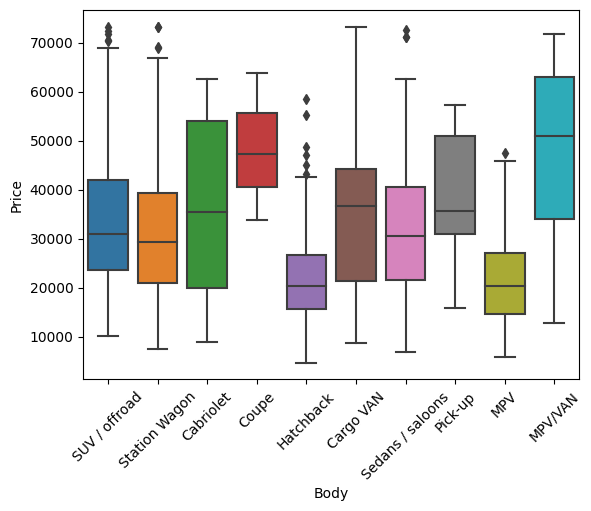

In [81]:
sns.boxplot(x="Body", y="Price", data=df)
plt.xticks(rotation=45)
plt.show()

In [82]:
cal_anova_of_variable(['Body', 'Price'])

[[['Cabriolet'], 206.68072371252137],
 [['SUV / offroad'], 647.2534128237313],
 [['Hatchback'], 1946.3530947302445],
 [['Sedans / saloons'], 348.17921710610216],
 [['Station Wagon'], 383.66275701871996],
 [['Cargo VAN'], 272.45692103699287],
 [['Coupe'], 703.2283827535563],
 [['MPV'], 572.3214185268713],
 [['MPV/VAN'], 545.3779131737556],
 [['Pick-up'], 44.308999288898534]]

kiểu dáng 'Pick-up' ít ảnh hưởng đến giá xe nhất.

# Câu 6: Xe thuộc nhà sản xuất nào, kiểu dáng gì sẽ ảnh hưởng đến giá xe nhiều nhất


In [83]:
lst = cal_anova_of_variable(['Make', 'Body', 'Price'])
lst[np.argmax([lst[i][1] for i in range(len(lst))])][0]

['Hyundai', 'MPV/VAN']

Nhóm xe thuộc nhà sản xuất 'Hyundai' kiểu dáng 'MPV/VAN' ảnh hưởng đến giá xe nhất

# Câu 7: Tìm tập hợp gồm 3 giá trị biến phân loại bất kỳ có khả năng ảnh hưởng đến giá xe nhiều nhất.

In [84]:
category_col = [col_name for col_name in df.columns if type(df[col_name][0])==str]
category_col

['Make',
 'Model',
 'Body color',
 'Interior color',
 'Interior material',
 'Body',
 'Doors',
 'Seats',
 'Fuel',
 'Transmission',
 'Drive type',
 'Emission class',
 'Battery type',
 'Previous owners']

In [85]:
from itertools import combinations

def find_k_category_variable(category_col, k, type='max', return_lst=False):
  result, lst, temp_max, temp_min = [], [], 0, 0
  lst_group = list(combinations(category_col, k)) # tổ hợp k biến trong danh sách biến phân loại
  for group in lst_group:
    value = cal_anova_of_variable(list(group+('Price',)), option=False)
    if value:
      lst.append(value)
      result.append(group)

  if return_lst == True:
    return [[result[i], lst[i]] for i in np.argsort(lst)[::-1]]
  elif type=='max':
    return result[np.argmax(lst)]
  else: return result[np.argmin(lst)]

In [86]:
find_k_category_variable(category_col, 3, 'max')

('Doors', 'Transmission', 'Drive type')

Vậy bộ 3 biến phân loại 'Doors', 'Transmission', 'Drive type' ảnh hưởng đến giá xe nhiều nhất

# Câu 8: Tìm tập hợp gồm 4 giá trị biến phân loại bất kỳ có khả năng ít ảnh hưởng đến giá xe nhiều nhất.


In [87]:
find_k_category_variable(category_col, 4, 'min')

('Body color', 'Interior color', 'Emission class', 'Previous owners')

Vậy bộ 4 biến phân loại 'Body color', 'Interior color', 'Emission class', 'Previous owners' ít ảnh hưởng đến giá xe nhất

# Câu 9: Trong tất cả các biến kiểu phân loại của bộ dữ liệu thì biến nào có khả năng ảnh hưởng đến giá xe nhiều nhất

In [88]:
find_k_category_variable(category_col, 1, 'max')

('Transmission',)

Vậy trong các biến phân loại thì 'Transmission' ảnh hưởng đến giá xe nhiều nhất

# Câu 10: Kết quả phân tích các biến quan trọng đã thăm dò được

In [89]:
lst_numberic_important = [value[0] for value in lst_numberic_important]

In [90]:
lst_category_important = find_k_category_variable(category_col, 1, 'max', return_lst=True)
lst_category_important = [value[0][0] for value in lst_category_important]

In [91]:
# Mức độ quan trọng/ảnh hưởng giảm dần
print(f'Danh sách các biến số quan trọng: {lst_numberic_important}')
print(f'Danh sách các biến phân loại quan trọng: {lst_category_important}')

Danh sách các biến số quan trọng: ['Power', 'Engine capacity', 'First registration', 'Mileage']
Danh sách các biến phân loại quan trọng: ['Transmission', 'Drive type', 'Interior material', 'Body', 'Emission class', 'Make', 'Fuel', 'Model', 'Interior color', 'Previous owners', 'Seats', 'Doors', 'Body color', 'Battery type']
